# Assignment 10: Deep Neural Networks
Choosen Dataset:
[FIFA 2019 game dataset](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/)

The dataset is about predicting the position of football players in FIFA 2019 game.

Group Members:

 
*   Ali Zahedzadeh
*   Melika Noubakhtian


**Import Libraries**

In [7]:
import pandas as pd
import io
import os
import numpy as np
import copy
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from sklearn.metrics import f1_score
%matplotlib inline
sns.set(color_codes=True)

**Load Dataset**

In [8]:
path = './Fifa19.csv'
df = pd.read_csv(path)
df.shape

(16344, 89)


Now let's take a look at the first few rows of the data:

In [9]:
df.head()

,Club,Playing_in_League,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,Real Madrid,Spain Primera Division (1),177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
1,Real Madrid,Spain Primera Division (1),155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
2,Real Madrid,Spain Primera Division (1),182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
3,Real Madrid,Spain Primera Division (1),192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
4,Real Madrid,Spain Primera Division (1),200145,Casemiro,26,https://cdn.sofifa.org/players/4/19/200145.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,90,...,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,€126.4M


Unfortunately it seems that we have many null values in different columns:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16344 entries, 0 to 16343
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Club                      16344 non-null  object 
 1   Playing_in_League         16344 non-null  object 
 2   ID                        16344 non-null  int64  
 3   Name                      16344 non-null  object 
 4   Age                       16344 non-null  int64  
 5   Photo                     16344 non-null  object 
 6   Nationality               16344 non-null  object 
 7   Flag                      16344 non-null  object 
 8   Overall                   16344 non-null  int64  
 9   Potential                 16344 non-null  int64  
 10  Club Logo                 16344 non-null  object 
 11  Value                     16344 non-null  object 
 12  Wage                      16344 non-null  object 
 13  Special                   16344 non-null  int64  
 14  Prefer

# EDA and Data Cleaning

First, let's check different positions:

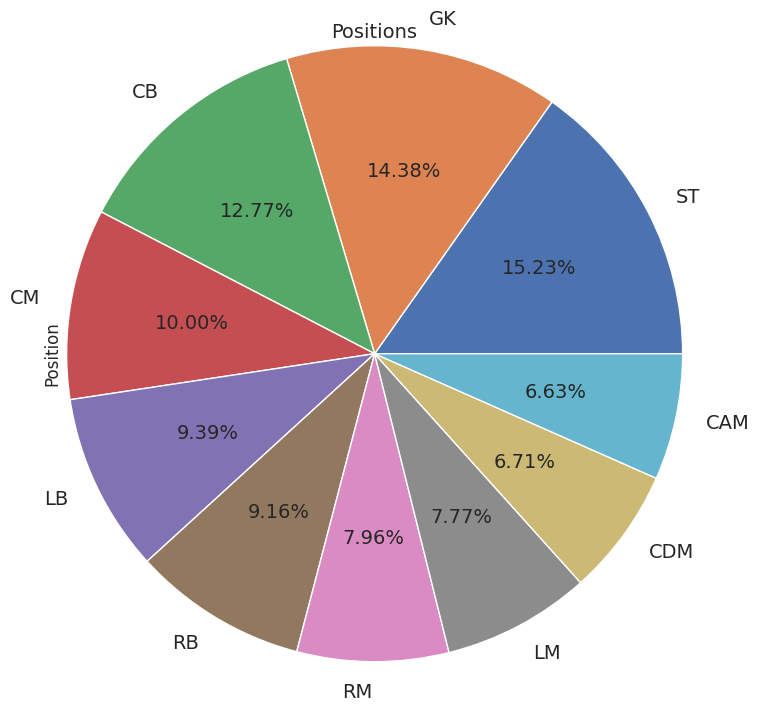

In [11]:
df['Position'].value_counts()[:10].plot(
    kind = 'pie',figsize=(16,8),autopct='%1.2f%%',radius=1.25,fontsize=14)


plt.title("Positions",fontsize=14)
plt.show()


We combine related positions to reduce their variety:

In [12]:
df.loc[df['Position']=='ST','Position']='CF'
df.loc[df['Position']=='RS','Position']='RF'
df.loc[df['Position']=='LS','Position']='LF'

# Midfield
df.loc[df['Position'].isin(['RCM','RAM','RDM']),'Position']='RM'
df.loc[df['Position'].isin(['LCM','LAM','LDM']),'Position']='LM'
df.loc[df['Position'].isin(['CAM','CDM']),'Position']='CM'

# Defense
df.loc[df['Position'].isin(['RW','RWB']),'Position']='RB'
df.loc[df['Position'].isin(['LW','LWB','CB']),'Position']='LB'

let's check how many null values we have in different columns. "**Loaned From**" has so many null values!

In [13]:
null_columns = []
for col_name in list(df.columns):
  no_null_values = sum(df[col_name].isnull())
  if no_null_values:
    print('Number of null values in column %s is %d' %(col_name,no_null_values))
    null_columns.append(col_name)

Number of null values in column Preferred Foot is 40
Number of null values in column International Reputation is 40
Number of null values in column Weak Foot is 40
Number of null values in column Skill Moves is 40
Number of null values in column Work Rate is 40
Number of null values in column Body Type is 40
Number of null values in column Real Face is 40
Number of null values in column Position is 40
Number of null values in column Jersey Number is 40
Number of null values in column Joined is 1174
Number of null values in column Loaned From is 15210
Number of null values in column Contract Valid Until is 40
Number of null values in column Height is 40
Number of null values in column Weight is 40
Number of null values in column LS is 1859
Number of null values in column ST is 1859
Number of null values in column RS is 1859
Number of null values in column LW is 1859
Number of null values in column LF is 1859
Number of null values in column CF is 1859
Number of null values in column RF i

At first, we drop "**Loaned From**" column then we drop other null values:

In [14]:
df.drop(['Loaned From'], axis=1, inplace=True)

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(13425, 88)

Time for feature engineering! Let's tak a look at one of skill columns. This columns has a certain format: number + number. We will take the first number:

In [18]:
df['CF']

0        84+3
1        71+3
2        82+3
4        73+3
5        83+3
         ... 
16337    55+2
16338    37+2
16340    56+2
16341    40+2
16343    51+2
Name: CF, Length: 13425, dtype: object

In [19]:
skills_columns = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM',
                  'LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB',
                  'LB','LCB','CB','RCB','RB']
for col_name in skills_columns:
  df[col_name] = df[col_name].str.split('+').str[0]
  df[col_name] = df[col_name].astype(int)

Now we drop some of unnecessary columns that are not related to player position:

In [20]:
df_orig = copy.deepcopy(df)
to_drop_columns = ['Name','Photo','Playing_in_League','Nationality','Flag','Club','Club Logo','Real Face','Joined','Contract Valid Until']
df.drop(to_drop_columns, axis=1, inplace=True)

Some of the columns are in the format of currency and we should change their format:

In [21]:
def convert_currency_to_number(x):
      output = x.replace('€','')
      if 'M' in x:
        output = output.replace('M','')
        output = float(output) * 1e6
      elif 'K' in x:
        output = output.replace('K','')
        output = float(output) * 1e3
      output = float(output)
      return output

In [22]:
df['Value'] = df['Value'].apply(convert_currency_to_number)
df['Wage'] = df['Wage'].apply(convert_currency_to_number)
df['Release Clause'] = df['Release Clause'].apply(convert_currency_to_number)

It seems that "Height" has unit of foot. So we convert them to Centimeters:

In [24]:
df['Height']

0        5'8
1        6'0
2        6'0
4        6'1
5        5'9
        ... 
16337    6'0
16338    6'0
16340    5'8
16341    6'4
16343    6'2
Name: Height, Length: 13425, dtype: object

In [25]:
def convert_height_to_number(x):
      output = x.replace("'",'.')
      return float(output)* 30.48

In [26]:
df['Height'] = df['Height'].apply(convert_height_to_number)

We have same condition for weight and we convert it to another unit:

In [27]:
def convert_weight_to_number(x):
      output = x.replace("lbs",'')
      return float(output)* .4205

In [28]:
df['Weight'] = df['Weight'].apply(convert_weight_to_number)

The unique values in categorical columns are not so many. So we will go with One-Hot encoding for all columns:

In [30]:
for col_name in list(df.select_dtypes(include = "object").columns):
  print('Number of unique values in column %s is %d\n' %(col_name,len(df[col_name].unique())))

Number of unique values in column Preferred Foot is 2

Number of unique values in column Work Rate is 9

Number of unique values in column Body Type is 9

Number of unique values in column Position is 10



In [31]:
target_positions = df.pop('Position')
to_one_hot_columns = list(df.select_dtypes(include = "object").columns)
onehot_column_names = []
for column in to_one_hot_columns:
    encoded_df = pd.get_dummies(df[column])
    df[encoded_df.columns] = encoded_df     # Insert the newly encoded columns into the dataset
    onehot_column_names += list(encoded_df.columns)
df.head()

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,Medium/ Medium,Akinfenwa,C. Ronaldo,Lean,Messi,Neymar,Normal,PLAYER_BODY_TYPE_25,Shaqiri,Stocky
0,177003,32,91,91,67000000.0,420000.0,2280,Right,4.0,4.0,...,0,0,0,1,0,0,0,0,0,0
1,155862,32,91,91,51000000.0,380000.0,2201,Right,4.0,3.0,...,0,0,0,0,0,0,1,0,0,0
2,182521,28,90,90,76500000.0,355000.0,2190,Right,4.0,5.0,...,1,0,0,0,0,0,1,0,0,0
4,200145,26,88,90,59500000.0,285000.0,2170,Right,3.0,3.0,...,0,0,0,0,0,0,1,0,0,0
5,197781,26,88,91,73500000.0,315000.0,2137,Right,3.0,3.0,...,0,0,0,0,0,0,1,0,0,0


Now we can drop non-numerical columns:

In [32]:
df.drop(to_one_hot_columns, axis=1, inplace=True)

Now we can scale our numerical columns (except for one-hot columns):

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

standard_scaling_columns = list(set(df.columns) - set(onehot_column_names))
df[standard_scaling_columns] = scaler.fit_transform(df[standard_scaling_columns])
df[standard_scaling_columns].describe()

,LongPassing,Weak Foot,Curve,Strength,Composure,Balance,Jumping,FKAccuracy,RAM,Positioning,...,Weight,LF,RWB,RM,GKPositioning,Height,GKReflexes,HeadingAccuracy,Crossing,Agility
count,1.342500e+04,1.342500e+04,1.342500e+04,1.342500e+04,1.342500e+04,1.342500e+04,1.342500e+04,13425.000000,1.342500e+04,1.342500e+04,...,1.342500e+04,1.342500e+04,1.342500e+04,1.342500e+04,1.342500e+04,1.342500e+04,1.342500e+04,13425.000000,1.342500e+04,1.342500e+04
mean,-1.016195e-16,-1.058537e-16,-6.774635e-17,-3.090927e-16,3.048586e-16,3.726049e-16,6.097171e-16,0.000000,2.371122e-16,-3.387317e-17,...,-2.163649e-15,1.354927e-16,-1.354927e-16,2.879220e-16,3.678415e-17,4.070073e-16,-1.508415e-16,0.000000,-3.387317e-17,4.234147e-16
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037,1.000037e+00,1.000037e+00,...,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037,1.000037e+00,1.000037e+00
min,-3.010286e+00,-3.149081e+00,-2.668574e+00,-3.276372e+00,-3.074321e+00,-3.664333e+00,-3.301034e+00,-2.419764,-3.263364e+00,-2.971789e+00,...,-3.357400e+00,-3.214914e+00,-2.955389e+00,-3.523627e+00,-3.089312e+00,-1.474697e+00,-3.058377e+00,-3.629894,-3.064366e+00,-3.517855e+00
25%,-5.908765e-01,-1.133562e-02,-7.594796e-01,-5.628217e-01,-6.439497e-01,-5.411549e-01,-6.187272e-01,-0.834601,-6.193831e-01,-5.988917e-01,...,-7.042488e-01,-5.875557e-01,-6.376150e-01,-6.279729e-01,-8.218042e-01,-1.452120e+00,-8.051098e-01,-0.704349,-6.662212e-01,-6.038348e-01
50%,1.349463e-01,-1.133562e-02,3.049059e-02,7.566076e-02,3.655423e-02,1.163562e-01,7.348107e-02,-0.174117,9.245790e-02,1.468759e-01,...,4.407604e-02,1.198099e-01,2.460618e-02,1.227523e-01,1.499849e-01,3.315014e-01,-1.613193e-01,0.070061,1.801826e-01,1.246704e-01
75%,6.994751e-01,-1.133562e-02,8.204608e-01,7.141432e-01,7.170581e-01,6.916784e-01,6.791633e-01,0.816610,7.026073e-01,6.892524e-01,...,6.563418e-01,7.261233e-01,6.868274e-01,6.589845e-01,7.978443e-01,7.830511e-01,8.043665e-01,0.672379,7.444519e-01,6.912855e-01
max,2.957590e+00,3.126410e+00,2.795386e+00,2.469970e+00,3.439074e+00,2.417645e+00,2.496210e+00,3.128305,3.448280e+00,2.723164e+00,...,5.350379e+00,3.454533e+00,3.004602e+00,3.340146e+00,7.276438e+00,2.363475e+00,8.529853e+00,3.167697,2.719394e+00,2.391131e+00


To train our model, we should enocode our labels:

In [37]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(target_positions)

In [38]:
target_positions

0         RM
1        RCB
2         LM
4         CM
5         LB
        ... 
16337     LM
16338     LB
16340     CF
16341     LB
16343     CF
Name: Position, Length: 13425, dtype: object

In [39]:
y

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

Now we can split our dataset to train and test sections:

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(10740, 94)
(2685, 94)


# Classification

Our classfication model is deisgned with keras and has multi-layers. Then we will tune different parameters of our network:

In [41]:
# Importing necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras import callbacks
import tensorflow as tf
from tensorflow.keras import initializers
from keras.regularizers import l2,l1,l1_l2

Callbacks can help us to avoid from overfitting and stop when we don't see significant improvements in our model performance. The following callback will stop model training when the reduce in validation loss is less then our desired value after 2 epochs. In Addition, it will return best weights according to this parameter:

In [42]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=2,
    restore_best_weights=True,
)

For simplicity of our evaluation process, we will use the defined functions that you will see in the follwoing:

We initiate the process by defining a function that constructs a multi-layered feedforward neural network. The functioning involves specifying the following parameters:

* `no_hidden_neurons`: a list indicating the number of neurons in each hidden layer, with the length of the list determining the number of hidden layers.
* `input_size`: the count of neurons in the input layer, set as `X_train.shape[1]`.
* `activation_func`: a string denoting the type of activation function.
* `l1_reg`: a real number serving as the l1-regularization coefficient in each layer; a higher value intensifies the regularization effect.
* `l2_reg`: a real number serving as the l2-regularization coefficient in each layer; a higher value intensifies the regularization effect.
* `learning_rate`: a real number indicating the learning rate in the gradient descent algorithm.
* `learning_rate_decay`: a real number indicating the rate at which the learning rate diminishes after a certain number of iterations.
* `dropout_rate`: the rate at which neurons undergo "dropout" during training; a value of 0 implies no dropout.
* `weight_initializer`: the name of the weight initialization technique employed to set up the weights at the algorithm's initiation.

Upon receiving these inputs, the function proceeds to generate the model based on the provided specifications. It then compiles the model and returns it as the output.

In [43]:
def create_model(no_hidden_neurons: list=[10], input_size=X_train.shape[1],
                 activation_func: str='relu', l1_reg: float=0.0, l2_reg: float=0.0,
                 learning_rate: float=0.001, learning_rate_decay: float=0.95,
                 dropout_rate: float=0.0,weight_initializer: str='',
                 optimizer_name: str='adam',regularization_type: str='kernel'):

  # Setup the weight initialization techniques
  if weight_initializer == 'RandomNormal':
    weight_initializer = initializers.RandomNormal()
  elif weight_initializer == 'RandomUniform':
    weight_initializer = initializers.RandomUniform()
  elif weight_initializer == 'Zeros':
    weight_initializer = initializers.Zeros()
  elif weight_initializer == 'GlorotUniform':
    weight_initializer = initializers.GlorotUniform()
  elif weight_initializer == 'GlorotNormal':
    weight_initializer = initializers.GlorotNormal()
  else:
    weight_initializer = None

  model = Sequential()

  model.add(Input(shape=input_size))
  itr = 0
  for n_l in no_hidden_neurons:
      if l1_reg and l2_reg:
        if regularization_type == 'activation':
          model.add(Dense(n_l, activation=activation_func,activity_regularizer=l1_l2(l1=l1_reg,l2=l2_reg),kernel_initializer=weight_initializer))
        else:
          model.add(Dense(n_l, activation=activation_func,kernel_regularizer=l1_l2(l1=l1_reg,l2=l2_reg),kernel_initializer=weight_initializer))
      elif l1_reg:
        if regularization_type == 'activation':
          model.add(Dense(n_l, activation=activation_func,activity_regularizer=l1(l1_reg),kernel_initializer=weight_initializer))
        else:
          model.add(Dense(n_l, activation=activation_func,kernel_regularizer=l1(l1_reg),kernel_initializer=weight_initializer))
      elif l2_reg:
        if regularization_type == 'activation':
          model.add(Dense(n_l, activation=activation_func,activity_regularizer=l2(l2_reg),kernel_initializer=weight_initializer))
        else:
          model.add(Dense(n_l, activation=activation_func,kernel_regularizer=l2(l2_reg),kernel_initializer=weight_initializer))
      else:
        model.add(Dense(n_l, activation=activation_func,kernel_initializer=weight_initializer))

      if dropout_rate and itr%2 == 0:
        model.add(Dropout(dropout_rate))

      itr += 1

  model.add(Dense(10, activation='softmax'))

  if optimizer_name == 'sgd':
    opimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  elif optimizer_name == 'RMSprop':
    opimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
  elif optimizer_name == 'Adadelta':
    opimizer = tf.keras.optimizers.Adadelta(learning_rate=learning_rate,rho=learning_rate_decay)
  else:
    opimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate,beta_1=learning_rate_decay)
  model.compile(
        loss='categorical_crossentropy',
        optimizer=opimizer,
        metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],
        )

  return model

The following function will return us the most probable label for each predicted intstance based on the highest probablity:

In [44]:
def convert_predictions(predictions):
  output = np.argmax(predictions,axis=1)
  return output

To simplify processes and facilitate code reuse, we establish a corresponding wrapper function for k-fold cross-validation, employing it consistently throughout this notebook. The function is configured with the following inputs:

* `no_folds`: denoting the number of folds to be utilized.
* `models_params`: a dictionary encompassing the parameters required for the create_model() function mentioned earlier.
* `training_params`: the parameters employed to fine-tune the training algorithm.

Upon specifying these inputs, the function iterates over the designated number of folds and returns the average and standard deviation of accuracy over the validation set.

In [46]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [47]:
def kfold_validation(no_folds: int=4,
                     model_params: dict={},training_params: dict={}):
  validation_set_accuracy = []
  models = []

  itr = 0
  kf = KFold(n_splits=no_folds)
  for train_index, val_index in kf.split(X_train,y_train):
    train_set, y_train_set = X_train.iloc[train_index], y_train[train_index]
    val_set,y_val = X_train.iloc[val_index], y_train[val_index]

    model = create_model(**model_params)


    history = model.fit(train_set, y_train_set,
                      validation_data=(val_set,y_val),
                      callbacks=[early_stopping],
                      verbose=0,
                      **training_params,
                      )


    pred_val = model.predict(val_set)
    acc = accuracy_score(convert_predictions(y_val), convert_predictions(pred_val))

    validation_set_accuracy.append(acc)
    models.append(model)

  validation_set_accuracy = np.array(validation_set_accuracy)

  best_model = models[np.argmax(validation_set_accuracy)]

  return best_model,validation_set_accuracy.mean(),validation_set_accuracy.std()

In [50]:
kfold_params = {
    'no_folds': 4,
    'model_params': {
      'no_hidden_neurons': [50, 20],
      'activation_func': 'sigmoid',
      'l1_reg': 0,
      'l2_reg': 0,
      'learning_rate': 0.001,
      'learning_rate_decay': 0.99,
      'dropout_rate':0,
      'weight_initializer': None,
      'optimizer_name': 'adam',
      'regularization_type': 'kernel',
  },
  'training_params': {
    'batch_size': 16,
    'epochs': 5
  }
}

The final function! It iterates through the items of the list one by one and conducts k-fold cross-validation.Then it records the accuracy for both the validation and test sets. Finally it visualizes the results and provides the best value along with the best model as the output.

In [51]:
def evaluate_efect_param(parameter_type: str='kfold', parameter_name: str='', values_list: list=[]):
  scores_val = []
  scores_test = []
  models = []
  for val in values_list:

      if parameter_type == 'kfold':
        kfold_params[parameter_name] = val
      elif parameter_type == 'model_params':
        kfold_params['model_params'][parameter_name] = val
      elif parameter_type == 'training_params':
        kfold_params['training_params'][parameter_name] = val

      model,validation_set_accuracy_mean,validation_set_accuracy_std = kfold_validation(**kfold_params)

      scores_val.append(validation_set_accuracy_mean)

      predictions = model.predict(X_test)
      score_test = accuracy_score(convert_predictions(y_test), convert_predictions(predictions))
      scores_test.append(score_test)

      models.append(model)
      print('Val: %s, Validation Score: %.3f, Test Score: %.3f' %(str(val),validation_set_accuracy_mean,score_test))


  plt.figure(figsize=(20,8))
  str_values_list = []
  for v in values_list:
    str_values_list.append(str(v))

  plt.plot(str_values_list,scores_test,lw=5)
  plt.plot(str_values_list,scores_val,lw=5,color='orange')
  plt.xlabel(parameter_name)
  plt.ylabel('Accuracy')
  plt.legend(['Acc: Test Set','Acc: Validation Set'])
  plt.show()

  best_model = models[np.argmax(scores_val)]
  best_val = values_list[np.argmax(scores_val)]

  return best_model,best_val


# Learning Rate

At first we tune learning rate for our dataset:

84/84 [==============================] - 0s 2ms/step
Val: 0.0001, Validation Score: 0.448, Test Score: 0.466
84/84 [==============================] - 0s 2ms/step
Val: 0.001, Validation Score: 0.585, Test Score: 0.589
84/84 [==============================] - 0s 2ms/step
Val: 0.01, Validation Score: 0.590, Test Score: 0.588
84/84 [==============================] - 0s 2ms/step
Val: 0.05, Validation Score: 0.528, Test Score: 0.550
84/84 [==============================] - 0s 2ms/step
Val: 0.1, Validation Score: 0.476, Test Score: 0.492


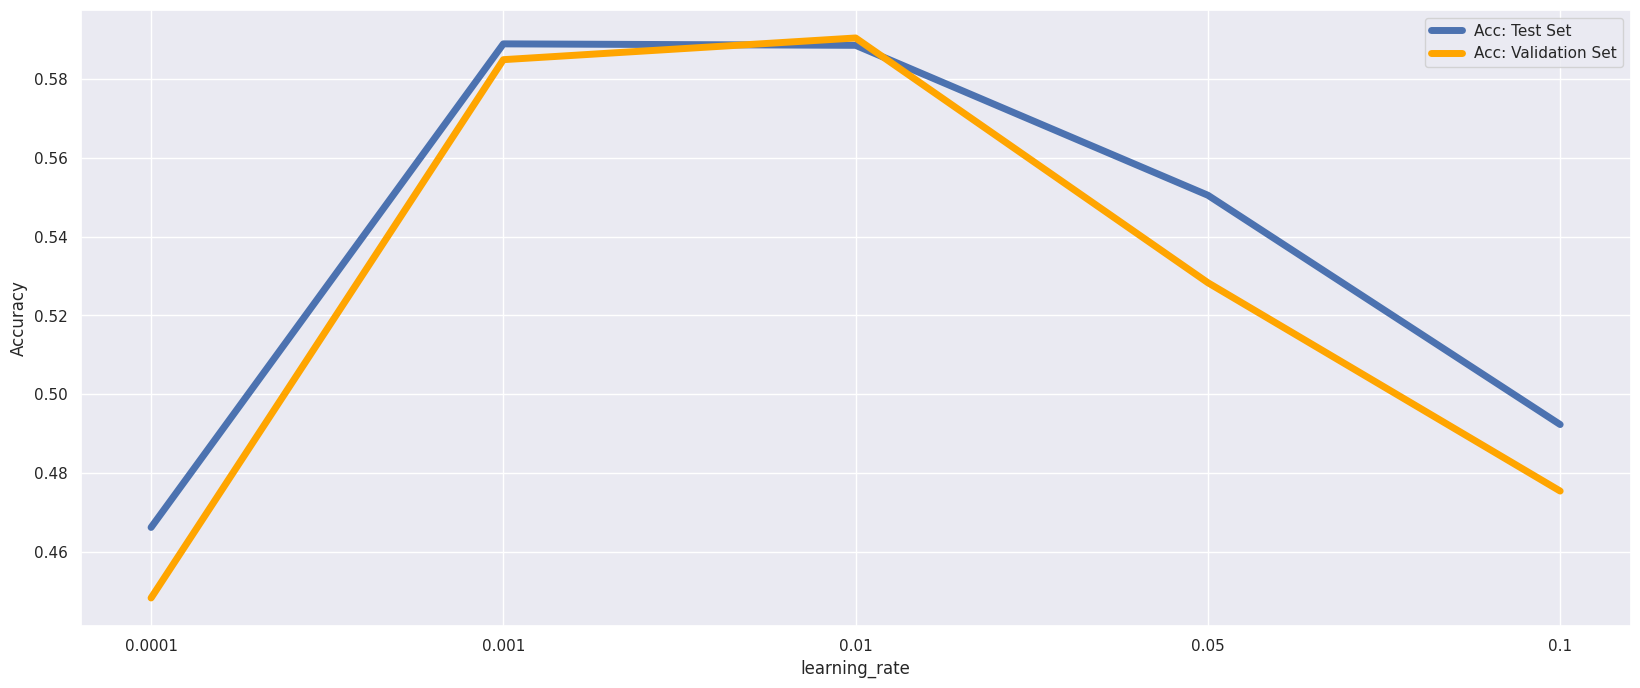

In [52]:
model,best_lr = evaluate_efect_param(parameter_type='model_params',parameter_name='learning_rate', values_list=[0.0001,0.001,.01,0.05, 0.1])

In [65]:
best_lr

0.01

The best learning rate for our dataset is 0.01. Very high or low values for learning rate will dercrease performance significantly.

# Learning Rate Decay


It's time to tune learning rate deacy!

84/84 [==============================] - 0s 2ms/step
Val: 0.7, Validation Score: 0.596, Test Score: 0.575
84/84 [==============================] - 0s 3ms/step
Val: 0.75, Validation Score: 0.594, Test Score: 0.591
84/84 [==============================] - 0s 2ms/step
Val: 0.85, Validation Score: 0.591, Test Score: 0.592
84/84 [==============================] - 0s 2ms/step
Val: 0.95, Validation Score: 0.593, Test Score: 0.603
84/84 [==============================] - 0s 2ms/step
Val: 0.98, Validation Score: 0.593, Test Score: 0.589


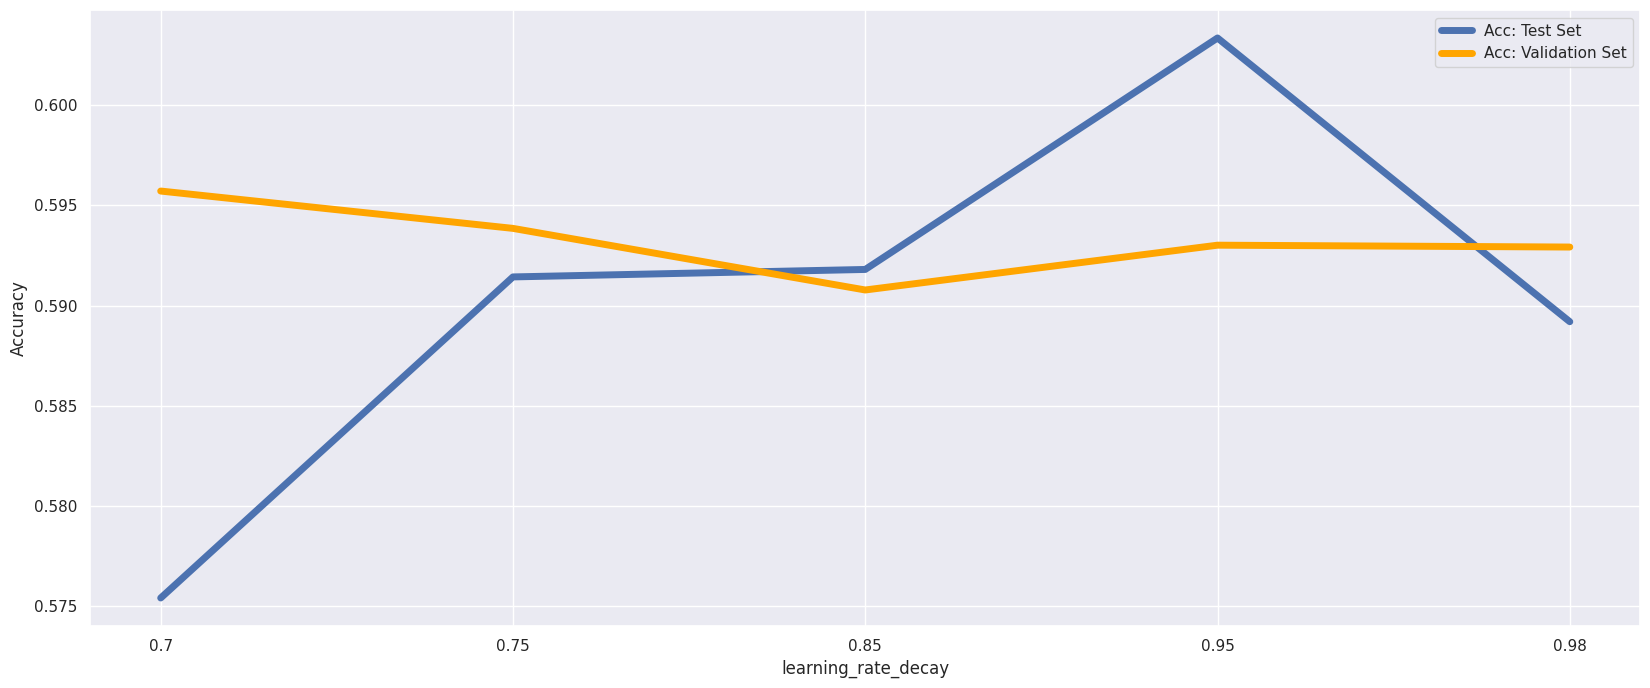

In [53]:
kfold_params['model_params']['learning_rate'] = best_lr
model,best_lr_decay = evaluate_efect_param(parameter_type='model_params',parameter_name='learning_rate_decay', values_list=[0.70,0.75,0.85,0.95,0.98])

Chnaging learning rate decay does not affect the accuracy of validation so much but on the test set, the effect of changing learning rate is more visible.

# Batch Size

Now we see the effect of batch size:

84/84 [==============================] - 0s 2ms/step
Val: 4, Validation Score: 0.584, Test Score: 0.577
84/84 [==============================] - 0s 2ms/step
Val: 16, Validation Score: 0.591, Test Score: 0.585
84/84 [==============================] - 0s 2ms/step
Val: 32, Validation Score: 0.596, Test Score: 0.596
84/84 [==============================] - 0s 2ms/step
Val: 64, Validation Score: 0.596, Test Score: 0.594
84/84 [==============================] - 0s 2ms/step
Val: 128, Validation Score: 0.594, Test Score: 0.592


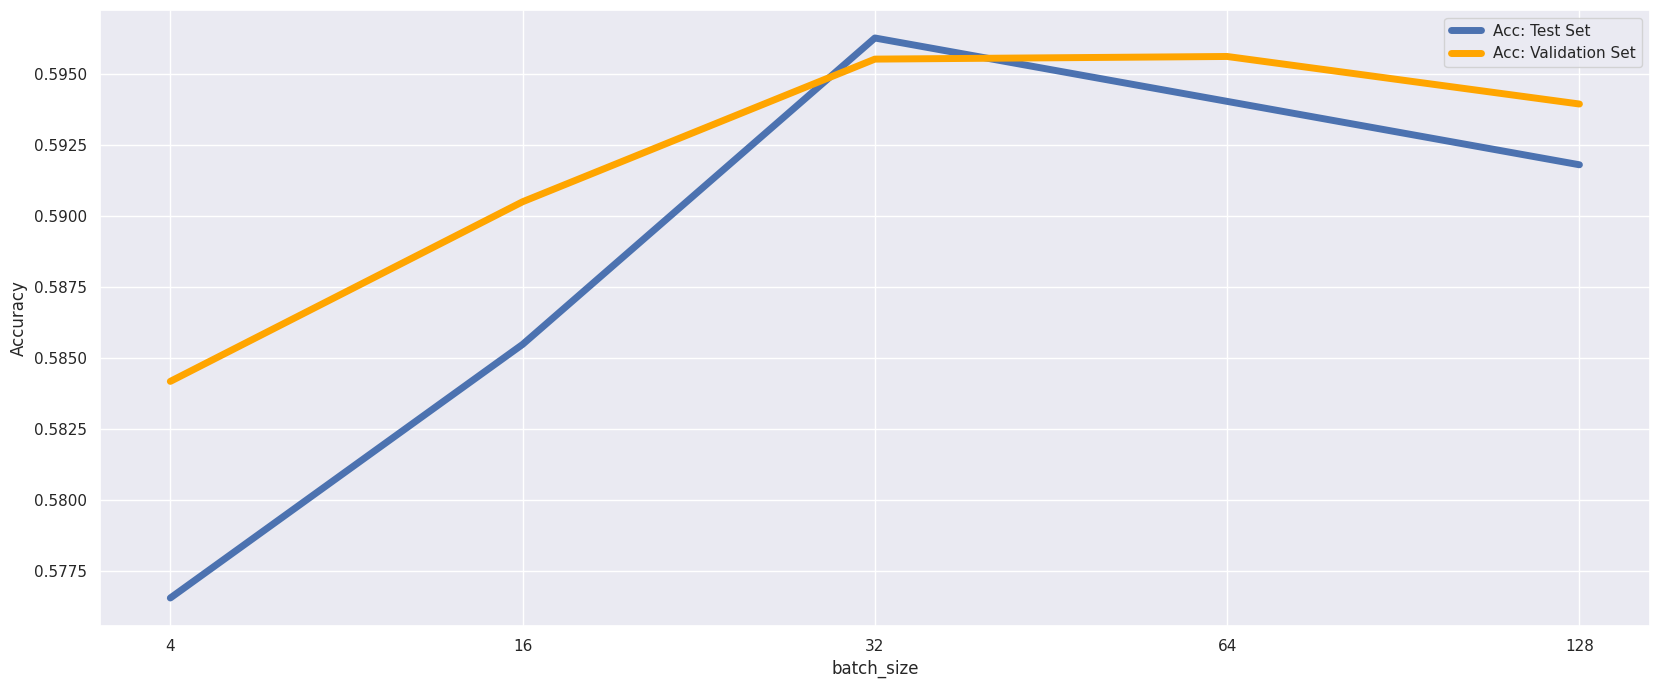

In [54]:
kfold_params['model_params']['learning_rate_decay'] = best_lr_decay
model,best_batch_size = evaluate_efect_param(parameter_type='training_params',parameter_name='batch_size', values_list=[4,16,32,64,128])

To some point, increasing batch size will improve the accuracy on the test set but after that the accuracy will decrease slightly.

# Weight Initialization Techniques


Now we try different weight initialization techniques:

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: RandomNormal, Validation Score: 0.594, Test Score: 0.587


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: RandomUniform, Validation Score: 0.596, Test Score: 0.593
84/84 [==============================] - 0s 2ms/step
Val: Zeros, Validation Score: 0.590, Test Score: 0.581


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: GlorotUniform, Validation Score: 0.600, Test Score: 0.593


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: GlorotNormal, Validation Score: 0.595, Test Score: 0.599


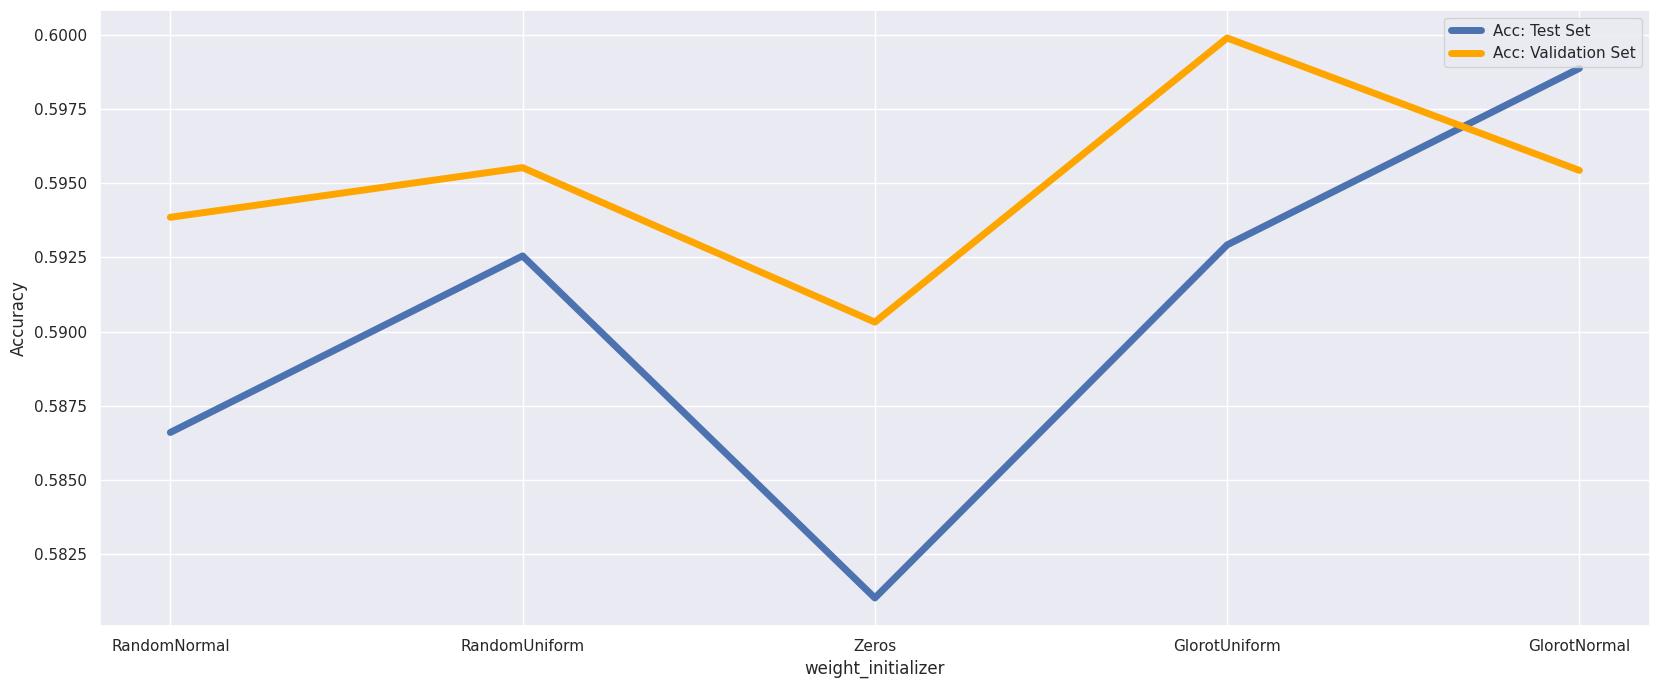

In [55]:
weight_initializers=['RandomNormal','RandomUniform','Zeros','GlorotUniform','GlorotNormal']
kfold_params['training_params']['batch_size'] = best_batch_size
model,best_weight_initializer = evaluate_efect_param(parameter_type='model_params',parameter_name='weight_initializer', values_list=weight_initializers)

It is obvious that different weight initializers do not affect the model performance so much but the best weight initializer is "**GlorotUniform**".

In [56]:
kfold_params['model_params']['weight_initializer'] = best_weight_initializer

# Importance of Activation Functions

Now let's look at the impact of different activation functions:

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 3ms/step
Val: relu, Validation Score: 0.586, Test Score: 0.593


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: tanh, Validation Score: 0.589, Test Score: 0.598


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: sigmoid, Validation Score: 0.594, Test Score: 0.599


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: softplus, Validation Score: 0.591, Test Score: 0.602


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: selu, Validation Score: 0.591, Test Score: 0.578


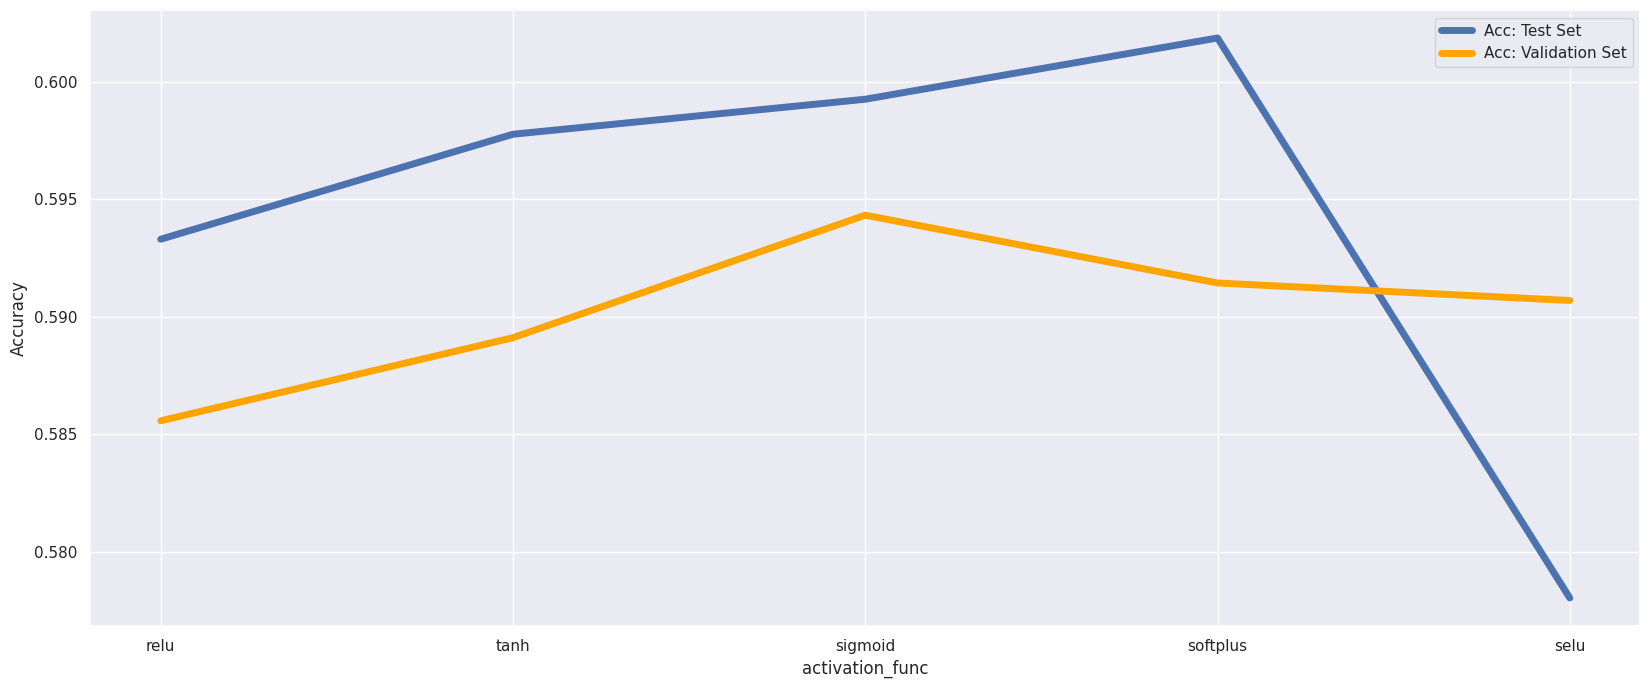

In [57]:
model,best_activation_func = evaluate_efect_param(parameter_type='model_params',parameter_name='activation_func', values_list=['relu','tanh','sigmoid','softplus','selu'])
kfold_params['model_params']['activation_func'] = best_activation_func

The best activation function for validation is **"sigmoid"** and the best one for test set is **"softplus"**. Changing activation function has more effect on test set accuracy.

# Effect of L1 and L2 Regularization (weight and activation)



At first, we see the effect of L1 and L2 on weights:

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 3ms/step
Val: 1e-05, Validation Score: 0.586, Test Score: 0.591


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.0001, Validation Score: 0.599, Test Score: 0.596


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.001, Validation Score: 0.582, Test Score: 0.576


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.01, Validation Score: 0.217, Test Score: 0.216


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.1, Validation Score: 0.217, Test Score: 0.216


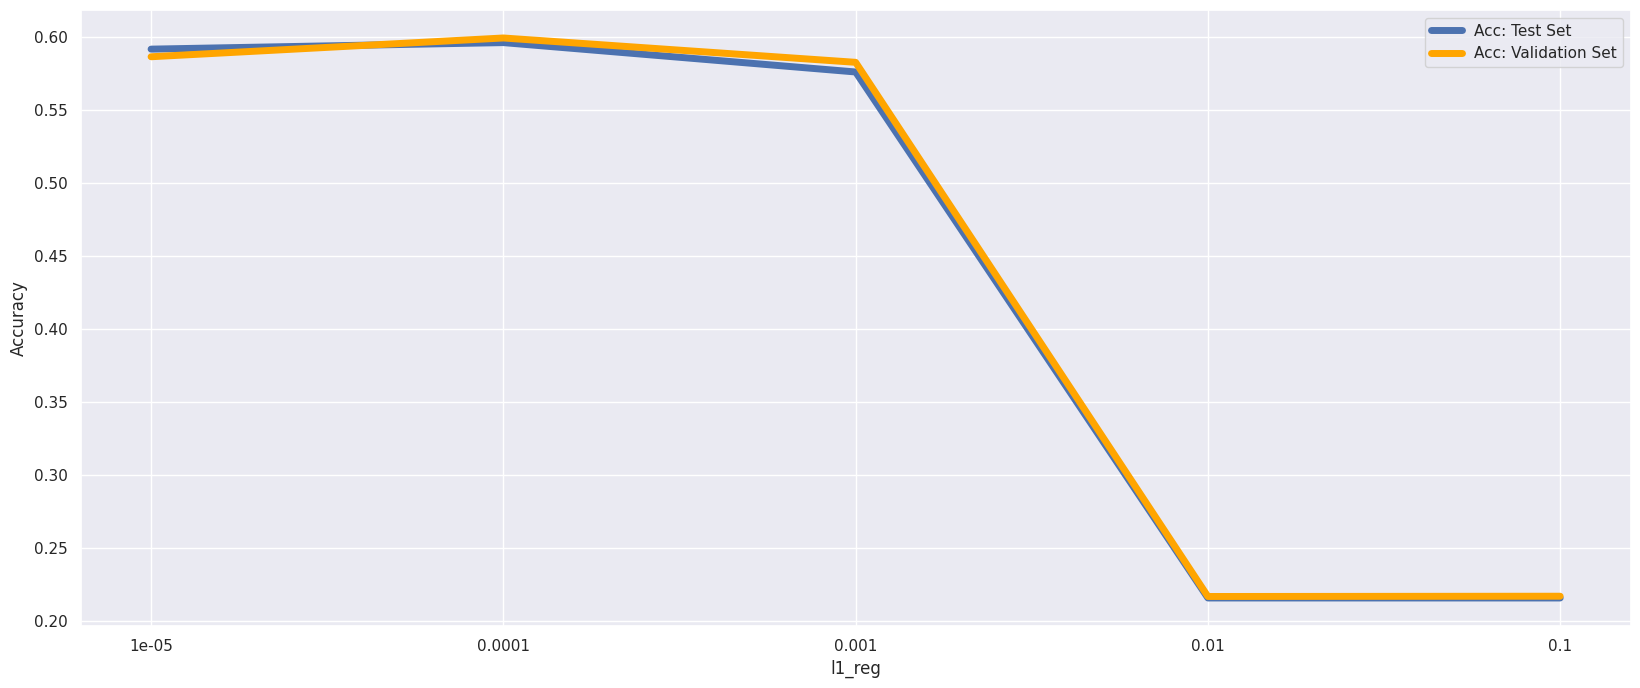

In [58]:
model,best_l1_reg = evaluate_efect_param(parameter_type='model_params',parameter_name='l1_reg', values_list=[0.00001,0.0001,0.001,0.01, 0.1])
kfold_params['model_params']['l1_reg'] = best_l1_reg

It looks like that using l1 on weights is not a good idea! High l1 values will decrease accuracy so much.


Now let's see the effect of l2 on weights:

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 1e-05, Validation Score: 0.593, Test Score: 0.582


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 3ms/step
Val: 0.0001, Validation Score: 0.595, Test Score: 0.590


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.001, Validation Score: 0.569, Test Score: 0.580


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.01, Validation Score: 0.473, Test Score: 0.482


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.1, Validation Score: 0.223, Test Score: 0.216


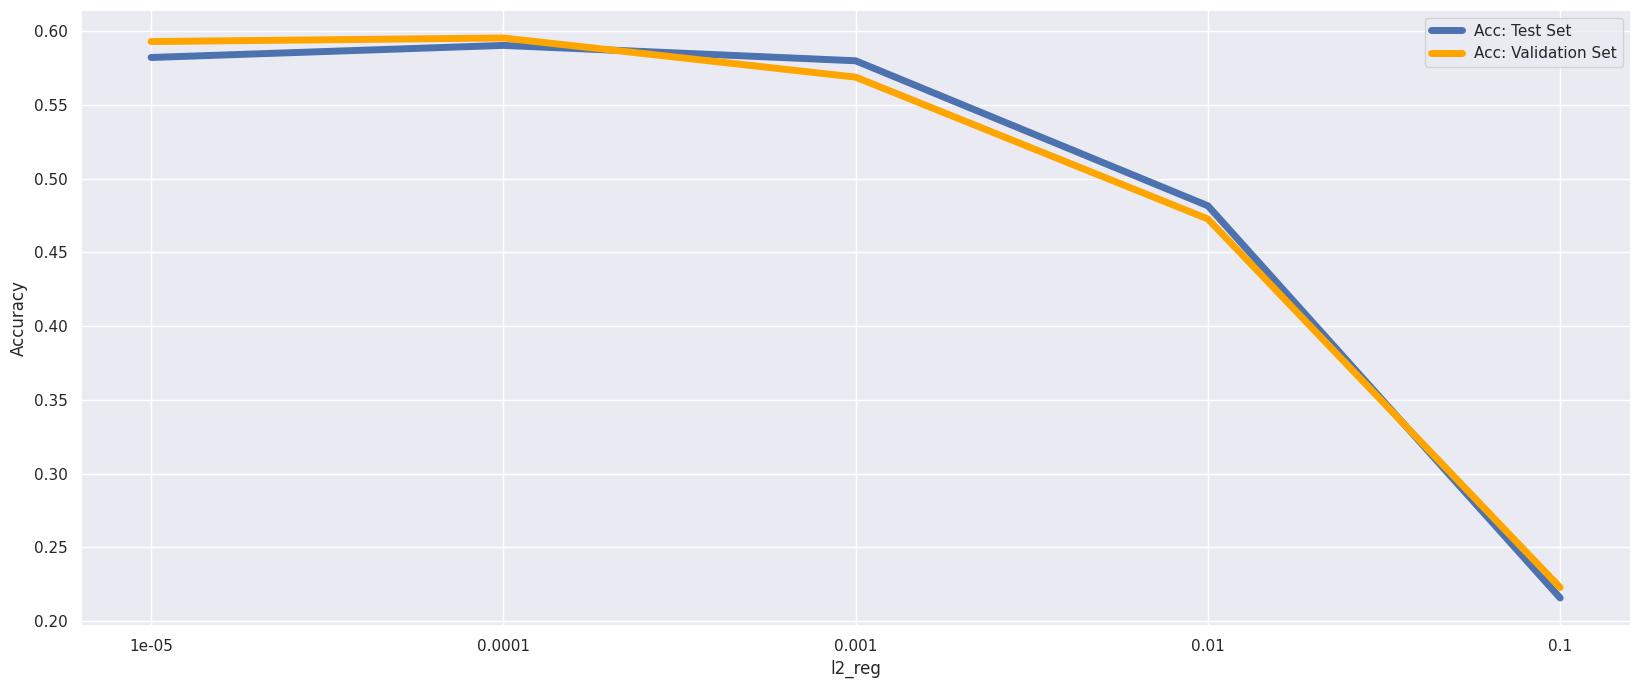

In [59]:
model,best_l2_reg = evaluate_efect_param(parameter_type='model_params',parameter_name='l2_reg', values_list=[0.00001,0.0001,0.001,0.01, 0.1])
kfold_params['model_params']['l2_reg'] = best_l2_reg

We have the same scenario like l1 and more l2 regularization will decrease our performance.

Now we see the effect of different regularizers on activations functions:

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 1e-05, Validation Score: 0.595, Test Score: 0.595


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.0001, Validation Score: 0.594, Test Score: 0.587


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.001, Validation Score: 0.601, Test Score: 0.597


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.01, Validation Score: 0.597, Test Score: 0.587


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.1, Validation Score: 0.547, Test Score: 0.586


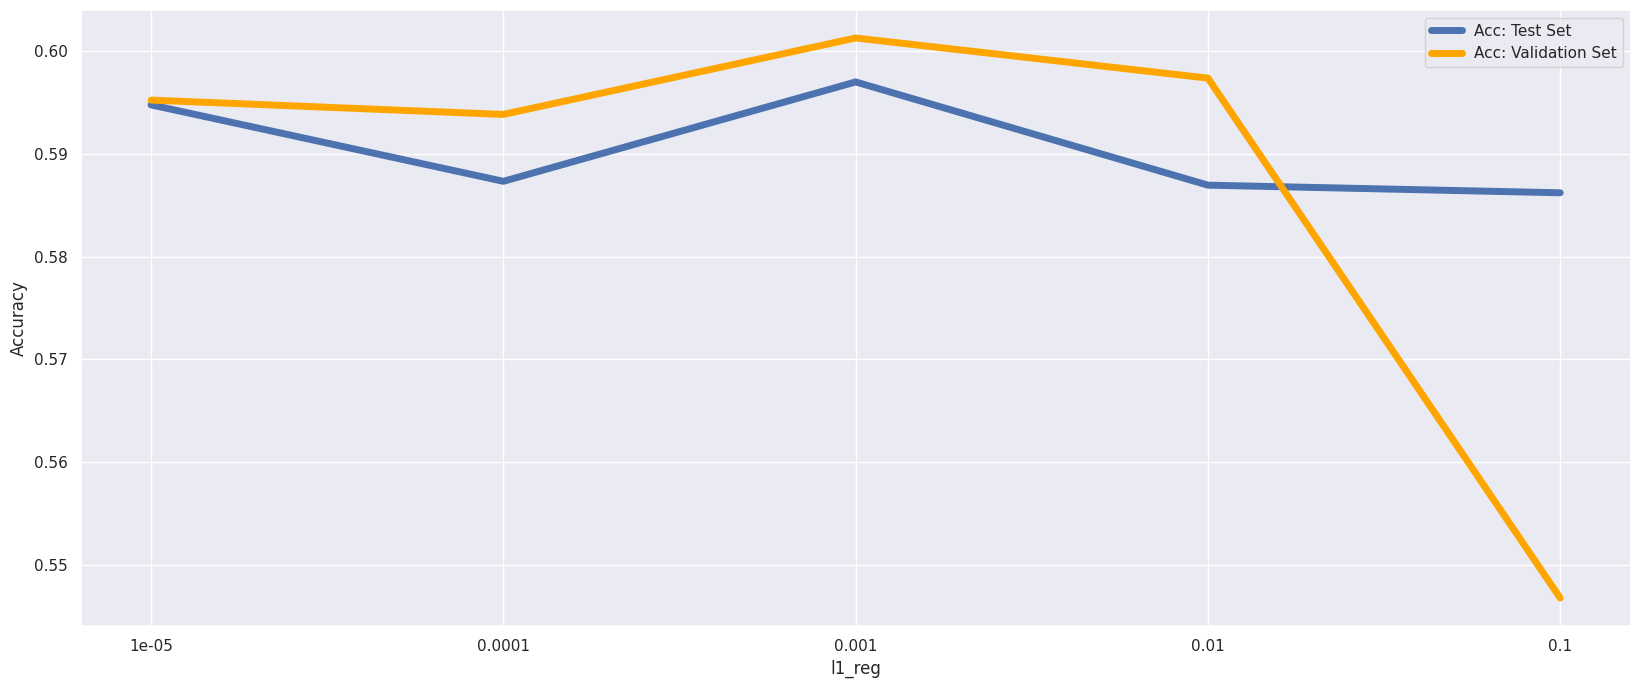

In [60]:
kfold_params['model_params']['regularization_type'] = 'activation'
model,best_l1_reg = evaluate_efect_param(parameter_type='model_params',parameter_name='l1_reg', values_list=[0.00001,0.0001,0.001,0.01, 0.1])
kfold_params['model_params']['l1_reg'] = best_l1_reg

With high l1 values, we will have performance drops on the validation accuracy. But unlike the l1 and l2 on weights, it will not reduce accuracy so much.

It's time for l2 on activation function:

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 1e-05, Validation Score: 0.597, Test Score: 0.595


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.0001, Validation Score: 0.596, Test Score: 0.585


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.001, Validation Score: 0.593, Test Score: 0.587


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.01, Validation Score: 0.591, Test Score: 0.588


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.1, Validation Score: 0.586, Test Score: 0.586


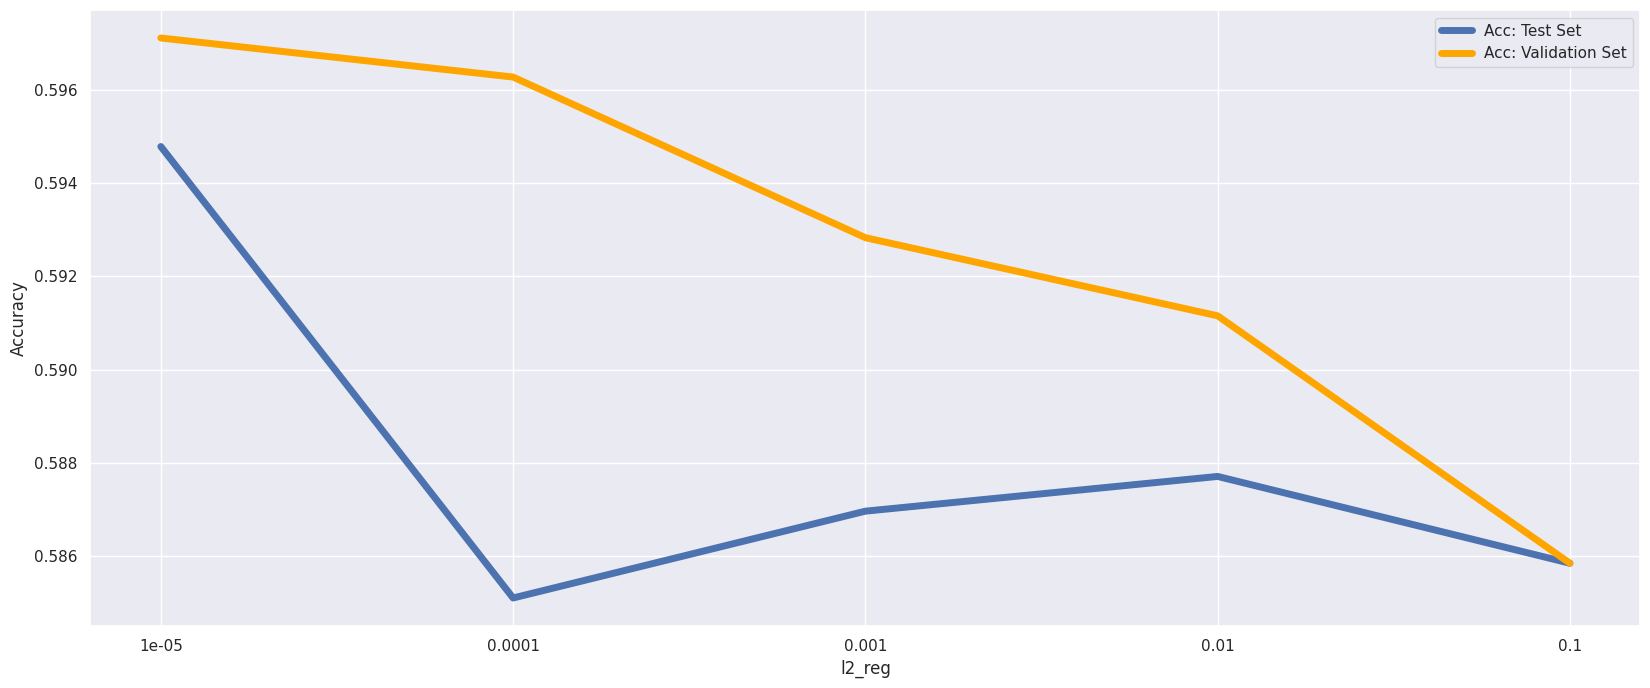

In [61]:
model,best_l2_reg = evaluate_efect_param(parameter_type='model_params',parameter_name='l2_reg', values_list=[0.00001,0.0001,0.001,0.01, 0.1])
kfold_params['model_params']['l2_reg'] = best_l2_reg

With increasing l2, we will see a descending trend in accuracy on validation score.

# Dropout



The effect of dropout is more visible on test set. Because dropout will decrese the effect of overfitting, we expected that increasing dropout to some point will give use better results on test set:

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.0001, Validation Score: 0.598, Test Score: 0.592


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 3ms/step
Val: 0.01, Validation Score: 0.598, Test Score: 0.598


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.1, Validation Score: 0.599, Test Score: 0.586


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.3, Validation Score: 0.597, Test Score: 0.603


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: 0.5, Validation Score: 0.595, Test Score: 0.599


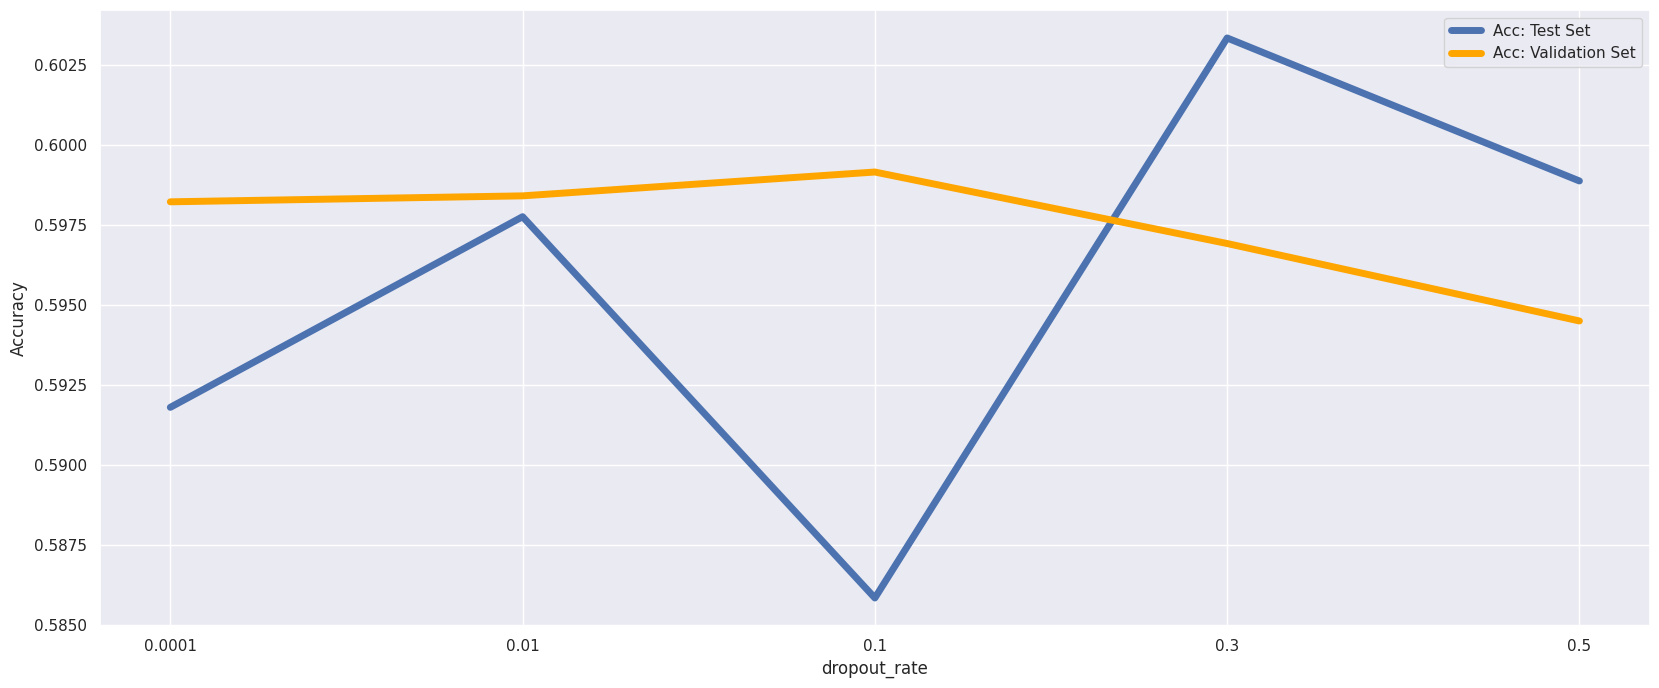

In [62]:
model,best_dropout_rate = evaluate_efect_param(parameter_type='model_params',parameter_name='dropout_rate', values_list=[0.0001,0.01,0.1,0.3, 0.5])
kfold_params['model_params']['dropout_rate'] = best_dropout_rate

# Number of Layers and Network Size


The effect of network size and layers on test set is interestig! With simpler networks and less neurons, we will have better results on test set. The generalization ability of simpler networks is more so their function on test set is better. But for the validation set, the best network is [30, 20] which is neither so complex nor so simple:

84/84 [==============================] - 0s 2ms/step
Val: [20], Validation Score: 0.588, Test Score: 0.596


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: [30, 20], Validation Score: 0.597, Test Score: 0.595


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 3ms/step
Val: [35, 25, 15], Validation Score: 0.590, Test Score: 0.595


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: [35, 25, 20, 15], Validation Score: 0.588, Test Score: 0.592


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: [40, 20], Validation Score: 0.588, Test Score: 0.584


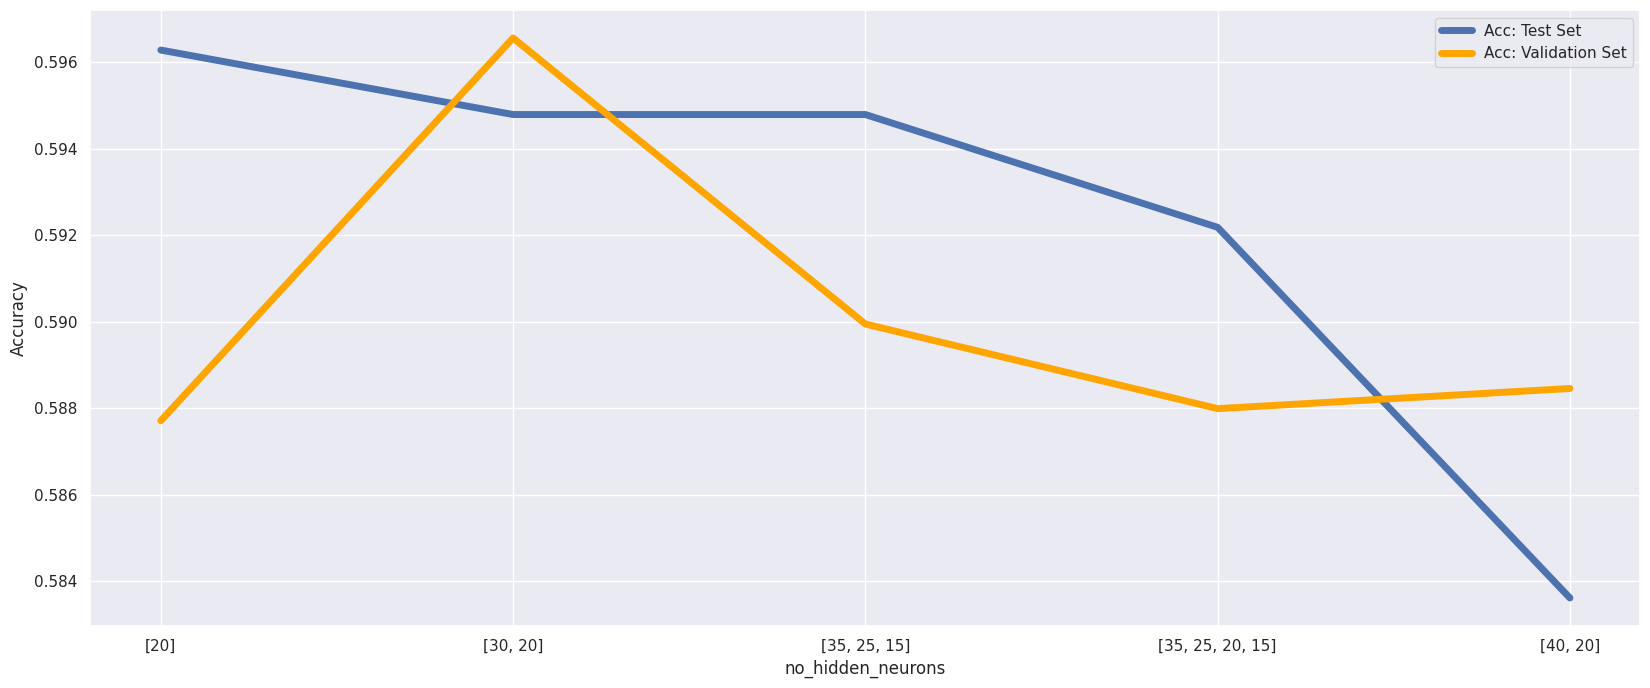

In [63]:
model,best_architecture = evaluate_efect_param(parameter_type='model_params',parameter_name='no_hidden_neurons',values_list=[[20],[30,20],[35,25,15],[35,25,20,15], [40, 20]])
kfold_params['model_params']['no_hidden_neurons'] = best_architecture

# Optimizer


Let's see the effect of optimizer on the performance.

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: sgd, Validation Score: 0.269, Test Score: 0.283


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: adam, Validation Score: 0.597, Test Score: 0.593


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: RMSprop, Validation Score: 0.594, Test Score: 0.592


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: Adadelta, Validation Score: 0.114, Test Score: 0.197


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
Val: AdamW, Validation Score: 0.590, Test Score: 0.582


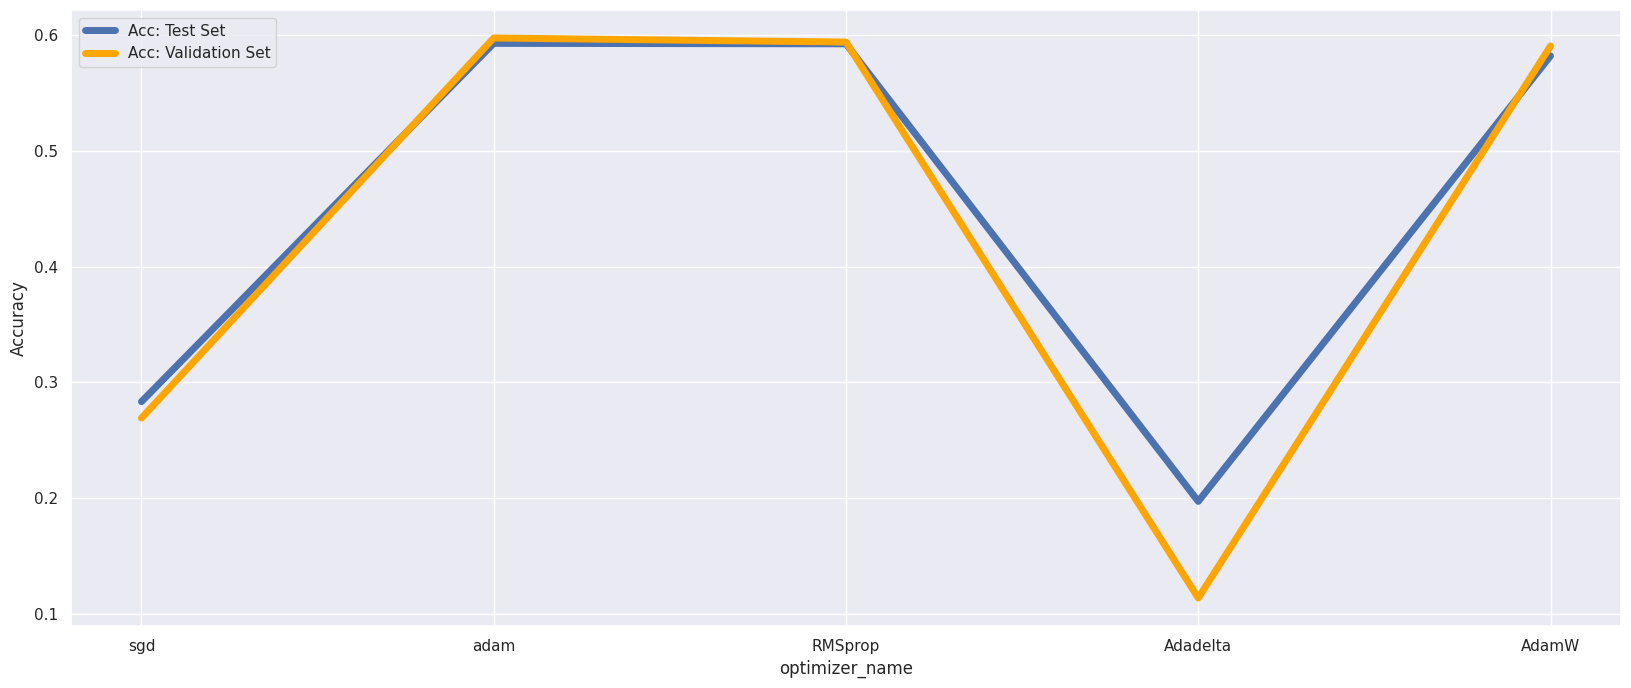

In [64]:
model,best_optimizer = evaluate_efect_param(parameter_type='model_params',parameter_name='optimizer_name', values_list=['sgd','adam','RMSprop','Adadelta','AdamW'])
kfold_params['model_params']['optimizer_name'] = best_optimizer

The choice of optimizer can change our performance so much. "**sgd**" and "**Adadelta**" are not suitable choices for optimizer but other optimizer have approximately same imapct on performance

# Why it gets more difficult to train deep neural networks when the number of layers increase?

Training deep neural networks becomes more challenging as the number of layers increases due to several reasons:

1. **Vanishing and Exploding Gradients:**
   - **Vanishing Gradients:** In deep networks, during backpropagation, gradients can become extremely small as they are propagated back through the layers. This can result in the weights of the earlier layers being updated very little, causing these layers to learn very slowly or not at all.
   - **Exploding Gradients:** Conversely, gradients can also become very large, leading to instability in training. This can cause the weights to be updated by large amounts, leading to erratic behavior during training.

2. **Computational Intensity:**
   - As the number of layers increases, the computational demands during both forward and backward passes grow significantly. Deep networks require more computation to perform each update, making training time-consuming and resource-intensive.

3. **Overfitting:**
   - Deeper networks have a higher capacity to memorize the training data, which can lead to overfitting. Overfitting occurs when a model learns noise and details in the training data that do not generalize well to unseen data. Regularization techniques and careful tuning become crucial to mitigate overfitting in deep networks.

4. **Difficulty in Weight Initialization:**
   - Choosing appropriate initial values for the weights becomes more challenging as the depth of the network increases. Poor weight initialization can slow down convergence or result in the model getting stuck in local minima.

5. **Hyperparameter Tuning Complexity:**
   - With more layers, there are additional hyperparameters to tune, such as learning rates, dropout rates, and batch sizes. Finding an optimal set of hyperparameters becomes more complex, and the likelihood of finding a combination that works well across all layers decreases.

6. **Gradient Descent Optimization Challenges:**
   - Traditional optimization algorithms like plain stochastic gradient descent may struggle to find the optimal set of weights in deep networks. Advanced optimization techniques, such as adaptive learning rate methods, are often required to address convergence challenges.


